In [1]:
!nvidia-smi

Sat Mar  8 18:05:28 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# Budowa sieci neuronowych w PyTorch

Sieci neuronowe składają się z warstw operujących na tensorach zawierająch przetwarzane dane.
Warstwy są podstawowymi elementami składowymi sieci neuronowych.
Przestrzeń nazw `torch.nn` zawiera implementację wielu warstw pozwalające budować sieci neuronowe o różnych architekturach (w pełni połączone, splotowe, rekurencyjne czy Transformer).
Wszystkie warstwy z biblioteki PyTorch dziedziczą z klasy `nn.Module`.

**UWAGA**: Samodzielnie zaimplementowane warstwy czy sieci złożone z wielu warstw muszą również dziedziczyć z klasy `nn.Module`.
Pozwala to tworzyć sieci o złożonej architekturze, zawierające jako składowe prostsze sieci (moduły).

###Warstwy

Lista warstw zaimplementowana w bibliotece PyTorch: [link](https://pytorch.org/docs/stable/nn.html#module-torch.nn).


Większość warstw wchodzących w skład sieci neuronowych jest parametryzowana - zawiera zestaw parametrów (wag). Parametry warstwy bądź modułu sieci neuronowej są dostępne przez metody `parameters()` lub `named_parameters()`.
Parametry (wagi) modułów sieci są przechowywane jako tensory z domyślnie włączonym śledzeniem historii obliczeń (ustawiony atrybut `requires_grad`).
Parametry modułów sieci są inicjalizowane losowo i optymalizowane w procesie uczenia sieci metodą spadku wzdłuż gradientu.

In [2]:
import torch
import torch.nn as nn

###Warstwa liniowa
**Warstwa liniowa** `nn.Linear` stosuje przekształcenie liniowe (a właściwie afiniczne) na wejściowym tensorze $x$.
$$
y = x W^T + b
$$
gdzie $W$ jest macierzą wag a $b$ wektorem obiążenia (bias). Warsta liniowa jest elementem składowym perceptronu wielowarstwowego.
Parametry (wagi) warstwy liniowej, i wszystkich innych parametryzowanych warstw, są inicjalizowane losowo i optymalizowane w procesie uczenia.

Dokumentacja: [link](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).

In [3]:
def print_layer_parameters(layer: nn.Module):
    print(f"Parametry warstwy/modułu:")
    for name, param in layer.named_parameters():
        print(f"{name}: {param.shape=}  {param.requires_grad=}")

In [4]:
linear_layer = nn.Linear(in_features=10000, out_features=8)
print(linear_layer)

x = torch.rand((4, 10000))
print(f"\nRozmiar wejściowy: {x.shape}")
y = linear_layer(x)
print(f"Rozmiar wyjściowy: {y.shape}")

print_layer_parameters(linear_layer)

Linear(in_features=10000, out_features=8, bias=True)

Rozmiar wejściowy: torch.Size([4, 10000])
Rozmiar wyjściowy: torch.Size([4, 8])
Parametry warstwy/modułu:
weight: param.shape=torch.Size([8, 10000])  param.requires_grad=True
bias: param.shape=torch.Size([8])  param.requires_grad=True


###Warstwy nieliniowe

Poniżej opisanych jest kilka wybranych funkcji nieliniowych zaimplementowanych w bibliotece PyTorch.
Zauważmy, że przedstawione poniżej warstwy nieliniowe nie posiadają parametrów optymalizowanych w procesie uczenia.

**Warstwa nieliniowości** `nn.ReLU` (*rectified linear unit*) stosuje do każdego elemetu tensora funkcję:
$$
\mathrm{ReLU(x)} = \max(0, x)
$$

Dokumentacja: [link](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html).

In [5]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

#Pomocnicza funkcja ilustrująca działanie warstwy nieliniowości
def test_nonlinearity(nonlienar_layer: nn.Module, label:str):
    x = torch.rand((10,))*10 - 5     # Losowy 10-elementowy tensor o wartościach z przedziału (-10, 10)
    print(f"{x=}")
    y = nonlienar_layer(x)
    print(f"{y=}")

    # Wizualizacja wyników
    x = torch.linspace(-7, 7, 100)
    y = nonlienar_layer(x)
    figure(figsize=(3, 3))
    plt.plot(x.detach().numpy(), y.detach().numpy())
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.xlabel("x")
    plt.ylabel(label)
    plt.show()

x=tensor([ 0.2167,  2.1441,  2.5565, -2.9552, -1.4084,  4.4286,  0.1191,  2.7003,
        -4.7855, -3.8637])
y=tensor([0.2167, 2.1441, 2.5565, 0.0000, 0.0000, 4.4286, 0.1191, 2.7003, 0.0000,
        0.0000])


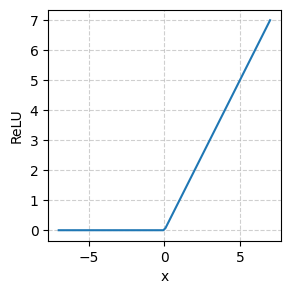

Parametry warstwy/modułu:


In [6]:
nonlinear_layer = nn.ReLU()

test_nonlinearity(nonlinear_layer, "ReLU")
print_layer_parameters(nonlinear_layer)

**Warstwa nieliniowości** `nn.GELU` (*Gaussian Error Linear Unit*) stosuje do każdego elemetu tensora funkcję:
$$
\mathrm{GELU(x)} = x \cdot \Phi \left( x \right) \, ,
$$
gdzie $\Phi$ jest dystrybuantą rozkładu normalnego.
Dokumentacja: [link](https://pytorch.org/docs/stable/generated/torch.nn.GELU.html#torch.nn.GELU).

x=tensor([ 0.4982,  1.3420, -2.0551, -4.7726, -3.1443,  4.7856,  1.7094, -4.3545,
         0.5162, -2.2370])
y=tensor([ 3.4420e-01,  1.2215e+00, -4.0964e-02, -4.2671e-06, -2.6181e-03,
         4.7856e+00,  1.6347e+00, -2.8939e-05,  3.5985e-01, -2.8286e-02])


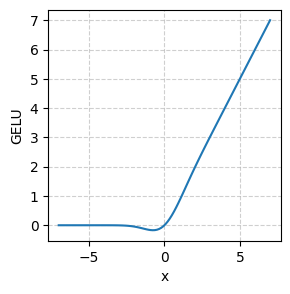

Parametry warstwy/modułu:


In [7]:
nonlinear_layer = nn.GELU()
test_nonlinearity(nonlinear_layer, "GELU")
print_layer_parameters(nonlinear_layer)

**Warstwa nieliniowości** `nn.SiLU` (*Sigmoid Linear Unit*, zwana również *swish*) stosuje do każdego elemetu tensora funkcję:
$$
\mathrm{SiLU(x)} = x \cdot \sigma \left( x \right) \, ,
$$
gdzie $\sigma$ jest funkcją logistyczną (sigmoidalną) zdefiniowaną:
$$
\sigma(x) = \frac{1}{1+e^{-x}}
$$
Dokumentacja: [link](https://pytorch.org/docs/stable/generated/torch.nn.SiLU.html).

x=tensor([ 1.2319,  1.8692, -1.0255, -4.6252,  2.2356,  2.9119, -1.7532, -1.4903,
        -2.4425,  1.8893])
y=tensor([ 0.9537,  1.6195, -0.2707, -0.0449,  2.0197,  2.7617, -0.2588, -0.2740,
        -0.1954,  1.6412])


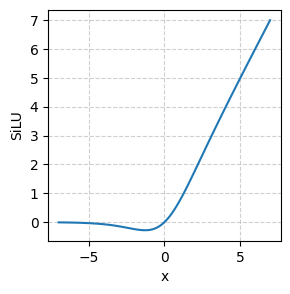

Parametry warstwy/modułu:


In [8]:
nonlinearz_layer = nn.SiLU()
test_nonlinearity(nonlinearz_layer, "SiLU")
print_layer_parameters(nonlinear_layer)

**Warstwa nieliniowości** `nn.Sigmoid` stosuje do każdego elemetu tensora funkcję logistyczną (sigmoidalną):
$$
\mathrm{Sigmoid(x)} = \sigma(x) =  \frac{1}{1+e^{-x}}
$$
Dokumentacja: [link](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html#torch.nn.Sigmoid).

x=tensor([ 4.7982, -0.5268, -0.5156, -0.2375,  4.4526, -3.2935, -4.5599,  3.3562,
         4.7292,  3.7169])
y=tensor([0.9918, 0.3713, 0.3739, 0.4409, 0.9885, 0.0358, 0.0104, 0.9663, 0.9912,
        0.9763])


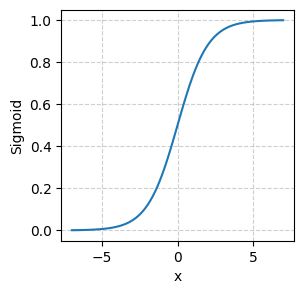

Parametry warstwy/modułu:


In [9]:
nonlinearz_layer = nn.Sigmoid()
test_nonlinearity(nonlinearz_layer, "Sigmoid")
print_layer_parameters(nonlinear_layer)

**Warstwa nieliniowości** `nn.Tanh`  stosuje do każdego elemetu tensora funkcję tangensa hiperbolicznego:
$$
\mathrm{tanh(x)} = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$
Dokumentacja: [link](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html#torch.nn.Tanh).

x=tensor([ 1.9464, -3.3401,  1.0432, -4.5302, -3.4140,  4.7768,  2.3210,  2.7423,
         4.4502,  0.6234])
y=tensor([ 0.9600, -0.9975,  0.7792, -0.9998, -0.9978,  0.9999,  0.9809,  0.9917,
         0.9997,  0.5535])


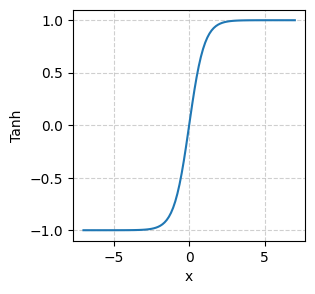

Parametry warstwy/modułu:


In [10]:
nonlinearz_layer = nn.Tanh()
test_nonlinearity(nonlinearz_layer, "Tanh")
print_layer_parameters(nonlinear_layer)

###Warstwy normalizacji

**Normalizacja wsadu** stosowana jest do normalizacji wartości przetwarzanych wektorów cech poprzez odjęcie średniej i podzielenie przez odchylenie standardowe. Pozwala to ustabilizować i przyśpieszyć proces uczenia i może poprawić generalizację modelu. Często stosowana jest w sieciach splotowych. Do dobrego działania wymaga wykorzystania dużych wsadów podczas trenowania modelu.

Warstwa normalizacji wsadu zdefiniowana jest wzorem:

$$
y = \frac{x - \mathbb{E}[x]}{\sqrt{\mathrm{Var}[x] + \epsilon}} \cdot \gamma + \beta
$$
$\gamma$ i $\beta$ są wyuczonymi parametrami rozmiaru $C$, gdzie $C$ jest liczbą cech albo kanałów wejścia.
* **W fazie treningu** - wartość oczekiwana i wariancja obliczane są po elementach wsadu. Dodatkowo obliczana i zapamiętywana jest średnia krocząca wartości oczekiwanej i wariancji dla wszystkich przetworzonych wsadów.
* **W fazie inferencji** - wykorzystywana jest wyznaczona w fazie treningu średnia krocząca wartości oczekiwanej i wariancji.

Warstwa `nn.BatchNorm1d` akceptuje tensor rozmiaru $(N, C)$ lub $(N, C, L)$ i zwraca tensor tego samego rozmiaru. Dokumentacja: [link](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html#torch.nn.BatchNorm1d).

Do normalizacji danych obrazowych stosowana jest warstwa `nn.BatchNorm2d` przetwarzająca mapy cech wizyjnych rozmiaru $(N,C,H,W)$.

In [11]:
def print_batchnorm_params(layer: nn.Module):
    print("Parametry warstwy:")
    print(f"Średnia krocząca wartości oczekiwanej: {layer.running_mean}")
    print(f"Średnia krocząca wariancji: {layer.running_var}")

In [12]:
# Defnicja warstwy BatchNorm1d
num_features = 5                # Liczba cech (kanałów)
batch_norm = nn.BatchNorm1d(num_features)
# Domyślnie warstwa tworzona jest w trybie treningowym (atrybut training ustawiony na True)
print(f"Tryb treningowy: {batch_norm.training=}")
print_batchnorm_params(batch_norm)

# Utwórz losowy tensor
batch_size = 3
input_tensor = torch.randn(batch_size, num_features)

print(f"Wejściowy tensor:\n {input_tensor}")

# zastosuj batchnormId
output_tensor = batch_norm(input_tensor)

print("\nPo zastosowaniu normalizacji wsadu:")
print(output_tensor)

print("\nŚrednie po wymiarze 0 (rozmiar wsadu):")
print(output_tensor.mean(dim=0))
print(f"Odchylenie standardowe po wymiarze 0 (rozmiar wsadu): {output_tensor.std(dim=0)}")
print()

print("\nŚrednie po wymiarze 1 (elementy wektorów cech/kanały):")
print(output_tensor.mean(dim=1))
print(f"Odchylenie standardowe po wymiarze 1 (elementy wektorów cech/kanały): {output_tensor.std(dim=1)}")
print()


print_batchnorm_params(batch_norm)

Tryb treningowy: batch_norm.training=True
Parametry warstwy:
Średnia krocząca wartości oczekiwanej: tensor([0., 0., 0., 0., 0.])
Średnia krocząca wariancji: tensor([1., 1., 1., 1., 1.])
Wejściowy tensor:
 tensor([[ 0.0945,  0.2079, -0.6937,  1.1523,  0.6219],
        [ 1.1916, -0.7696, -1.0656,  0.3289,  0.2166],
        [ 0.0966, -0.4587, -0.8714, -0.1997, -0.3088]])

Po zastosowaniu normalizacji wsadu:
tensor([[-0.7091,  1.3439,  1.2060,  1.3035,  1.1688],
        [ 1.4142, -1.0531, -1.2422, -0.1766,  0.1051],
        [-0.7051, -0.2908,  0.0362, -1.1268, -1.2739]],
       grad_fn=<NativeBatchNormBackward0>)

Średnie po wymiarze 0 (rozmiar wsadu):
tensor([-5.9605e-08, -1.9868e-08, -3.8619e-07,  3.9736e-08, -3.9736e-08],
       grad_fn=<MeanBackward1>)
Odchylenie standardowe po wymiarze 0 (rozmiar wsadu): tensor([1.2247, 1.2247, 1.2245, 1.2247, 1.2247], grad_fn=<StdBackward0>)


Średnie po wymiarze 1 (elementy wektorów cech/kanały):
tensor([ 0.8626, -0.1905, -0.6721], grad_fn=<MeanBack

**Normalizacja warstwy** `nn.LayerNorm` podobnie jak `nn.BatchNorm1d` stosowana jest do normalizacji wartości przetwarzanych wektorów cech poprzez odjęcie średniej i podzielenie przez odchylenie standardowe.
W odróżnieniu od warstwy `nn.BatchNorm1d` normalizacja przebiega po wymiarze cech (kanałów). Wartość oczekiwana i średnia wyznaczana jest dla każdego elementu wsadu z osobna.
Normalizacja warstwy często stosowana jest w sieciach rekurencyjnych lub opartych o architekturę Transformer.

Zdefiniowana jest wzorem:

$$
y = \frac{x - \mathbb{E}[x]}{\sqrt{\mathrm{Var}[x] + \epsilon}} \cdot \gamma + \beta \, ,
$$
gdzie $\gamma$ i $\beta$ są wyuczonymi parametrami.

Dokumentacja: [link](https://pytorch.org/docs/stable/generated/torch.nn.LayerNorm.html#torch.nn.LayerNorm)

In [13]:
# Defnicja warstwy LayerNorm

num_features = 5                # Liczba cech (kanałów)
layer_norm = nn.LayerNorm(num_features)

# Utwórz losowy tensor
batch_size = 3
input_tensor = torch.randn(batch_size, num_features)

print("\nWejściowy tensor:")
print(input_tensor)

# Zastosuj BatchNorm1d
output_tensor = layer_norm(input_tensor)

print("\nPo zastosowaniu normalizacji warstwy:")
print(output_tensor)

print("\nŚrednie po wymiarze 0 (rozmiar wsadu):")
print(output_tensor.mean(dim=0))
print(f"Odchylenie standardowe po wymiarze 0 (rozmiar wsadu): {output_tensor.std(dim=0)}")
print()

print("\nŚrednie po wymiarze 1 (elementy wektorów cech/kanały):")
print(output_tensor.mean(dim=1))
print(f"Odchylenie standardowe po wymiarze 1 (elementy wektorów cech/kanały): {output_tensor.std(dim=1)}")
print()



Wejściowy tensor:
tensor([[-0.2414,  0.1005,  0.8042, -0.1701, -0.8182],
        [ 0.9350,  0.4581, -1.0954, -0.4917,  0.6786],
        [ 1.1072,  0.3050, -0.3751,  0.0196, -0.3673]])

Po zastosowaniu normalizacji warstwy:
tensor([[-0.3342,  0.3136,  1.6471, -0.1992, -1.4273],
        [ 1.0930,  0.4711, -1.5551, -0.7677,  0.7587],
        [ 1.7698,  0.3051, -0.9365, -0.2160, -0.9224]],
       grad_fn=<NativeLayerNormBackward0>)

Średnie po wymiarze 0 (rozmiar wsadu):
tensor([ 0.8429,  0.3632, -0.2815, -0.3943, -0.5303], grad_fn=<MeanBackward1>)
Odchylenie standardowe po wymiarze 0 (rozmiar wsadu): tensor([1.0741, 0.0935, 1.6986, 0.3235, 1.1445], grad_fn=<StdBackward0>)


Średnie po wymiarze 1 (elementy wektorów cech/kanały):
tensor([ 1.7881e-08,  3.5763e-08, -1.4901e-08], grad_fn=<MeanBackward1>)
Odchylenie standardowe po wymiarze 1 (elementy wektorów cech/kanały): tensor([1.1180, 1.1180, 1.1180], grad_fn=<StdBackward0>)



**Warstwa odrzutu** `nn.Dropout` jest metodą regularyzacji wykorzystywaną w celu ograniczenia przeuczenia i polepszenia generalizacji sieci neuronowej.

*   **W fazie treningu** zerowane są losowo wybrane elementy przetwarzanego tensora. Elementy przetwarzanego tensora wygaszane są niezależnie, każdy z niewielkim prawdopodobieństwem $p$. Dodatkowo wyjście jest skalowane ze współczynnikiem $\frac{1}{1-p}$.
*   **W fazie inferencji** warstwa jest przekształceniem identycznościowym.

Dokumentacja: [link](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html).

###Inne warstwy

### Inne warstwy

Warstwa `nn.Flatten` pozwala zlinearyzować (spłaszczyć) wejściowy tensor do mniejszej liczby wymiarów.
Na przykład może zostać wykorzystana aby przekształcić obraz danych jako tensor $(n=4, c=3, h=64, w=64)$, gdzie $n$ jest rozmiarem wsadu, $c$ liczbą kanałów a $h, w$ to rodzielczość do rozmiarów $(n=4, c \cdot h \cdot w = 12\, 228)$.

Dokumentacja: [link](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).

In [14]:
image_height = 64
image_width = 64
image_tensor = torch.rand((4, 3, image_height, image_width))
print(f"Rozmiar wejściowy: {image_tensor.shape}")

flatten = nn.Flatten()
flat_image = flatten(image_tensor)
print(f"Rozmiar wejściowy: {flat_image.shape}")

Rozmiar wejściowy: torch.Size([4, 3, 64, 64])
Rozmiar wejściowy: torch.Size([4, 12288])


**Warstwa sekwencyjna** `nn.Sequential` pozwala zgrupować wiele połączonych sekwencyjnie warstw i traktować je jak jedną warstwę. Dane są przetwarzane przez poszczególne moduły w kolejności zdefiniowanej przy tworzeniu warstwy sekwencyjnej.

Przykład - **perceptron wielowarstwowy** (MLP - *multi layer perceptron*) składa się z kilku warstw liniowych połączonych warstwami nieliniowymi (np. `nn.ReLU`). Perceptron wielowarstwowy możemy zaimplementować jako warstwę sekwencyjną złożoną z trzech warstw liniowych oddzielonych nieliniowością `nn.ReLU`.

Zastosowanie warstw nieliniowych jest konieczne aby perceptron definiował nieliniową funkcję wejściowego tensora. Bezpośrednie połączenie kilku warstw liniowych, bez nieliniowości, jest przekształceniem linowym (może zostać zastąpione równoważną pojedynczą warstwą `nn.Linear`).

In [15]:
my_mlp = nn.Sequential(
    nn.Linear(10000, 256),
    nn.ReLU(),
    nn.Linear(256, 16),
    nn.ReLU(),
    nn.Linear(16, 4)
    )

print(my_mlp)
print()

input_tensor = torch.rand(2, 10000)
print(f"{input_tensor.shape=}")
logits = my_mlp(input_tensor)
print(f"{logits.shape=}")

Sequential(
  (0): Linear(in_features=10000, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=4, bias=True)
)

input_tensor.shape=torch.Size([2, 10000])
logits.shape=torch.Size([2, 4])


**Warstwa softmax** `nn.Softmax` stosuje funkcję Softmax wzdłuż podanego wymiaru wejściowego tensora. Stosowana do przekształcenia nieznormalizowanych wartości rzeczywistych zwracach przez sieć (zwanych logitami) w rozkład prawdopodobieństwa klas. Wynikowe wartości są z zakresu $[0, 1]$ i sumują się do $1$.

$$\mathrm{Softmax} \left( x_i \right)
=
\frac{\exp(x_i)}{\sum_j \exp(x_j)}
 $$

**UWAGA:** Warstwa Softmax nie powinna być używana wewnątrz modułu klasyfikatora do wyznaczenia rozkładu prawdopodobieństwa klas.
Klasyfikator oparty o sieć neuronową powinien zwracać nieznormalizowane wartości rzeczywiste (logity). Aby zwiększyć stabilność numeryczną funkcja straty `nn.CrossEntropyLoss` wykorzystywana w treningu klasyfikatorów oczekuje na wejściu nieznormalizowanych wartości (logitów) a NIE rozkładu prawdopodobieństwa.


Dokumentacja: [link](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html#softmax).

In [16]:
print(f"{logits=}")
print(f"Suma wartości logitów w wierszach: {logits.sum(dim=1)} \n")

softmax = nn.Softmax(dim=1)

probabilities = softmax(logits)
print(f"{probabilities}")
print(f"Suma wartości w wierszach po zastosowaniu softmax: {probabilities.sum(dim=1)=}\n")

print_layer_parameters(softmax)

logits=tensor([[ 0.0758,  0.2032, -0.0531,  0.1306],
        [ 0.0833,  0.2393, -0.0534,  0.1169]], grad_fn=<AddmmBackward0>)
Suma wartości logitów w wierszach: tensor([0.3565, 0.3862], grad_fn=<SumBackward1>) 

tensor([[0.2456, 0.2790, 0.2159, 0.2595],
        [0.2454, 0.2868, 0.2140, 0.2538]], grad_fn=<SoftmaxBackward0>)
Suma wartości w wierszach po zastosowaniu softmax: probabilities.sum(dim=1)=tensor([1.0000, 1.0000], grad_fn=<SumBackward1>)

Parametry warstwy/modułu:


#Przykład: Perceptron wielowarstwowy

W tym przykładzie zastosujemy **perceptron wielowarstwowy** do rozwiązania problemu klasyfikacji zbioru zawierającego syntetycznie wygenerowane punkty danych $x \in \mathbb{R}^{10}$ należące do dwóch klas.
We wcześniejszym notatniku do klasyfikacje tych danych zastosowaliśmy metodę regresji logistycznej, zaimplementowaną z wykorzystaniem pojedycznej warstwy liniowej. Ponieważ punkty danych nie były liniowo separowalne skuteczność regresji logitycznej była ograniczona.

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")# wybranie gpu, a jak nie odstepne to cpu
print("Urządzenie: {}".format(device))

Urządzenie: cuda:0


##Generowanie syntetycznych danych
Wygenerujmy zbiór zawierający syntetycznie wygeneorwane punkty danych $x \in \mathbb{R}^{10}$ należące do dwóch klas korzystając z funkcji `make_classification` z biblioteki scikit-learn ([link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)).

In [21]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import numpy as np

X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, n_informative=5, random_state=39)

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Liczba elementów w zbiorze danych: {X.shape[0]}")
print(f"Liczba cech: {X.shape[1]}")
print(f"Liczba klas: {len(np.unique(y))}")

Liczba elementów w zbiorze danych: 1000
Liczba cech: 10
Liczba klas: 2


In [28]:
print(X[:2])
print(y[:2])
print(X.shape)
print(y.shape)

[[-4.60150980e-01 -3.97798603e+00 -1.80999809e+00 -8.92094337e-01
  -2.78173698e+00  1.49904000e+00 -1.03562767e+00  2.66819713e+00
  -3.58832424e+00 -3.08222932e+00]
 [ 7.84419044e-02 -3.46782807e+00  2.02885829e+00 -8.08185120e-01
   2.16578073e-01 -1.20707461e+00 -1.28950482e-03 -5.24603091e-01
   3.51380642e-01  5.69969889e+00]]
[0 1]
(1000, 10)
(1000,)


Wizualizacja dwóch wybranych cech. Możemy zauważyć, że dla dwóch losowo wybranych cech elementy z różnych klas nie są liniowo separowalne.

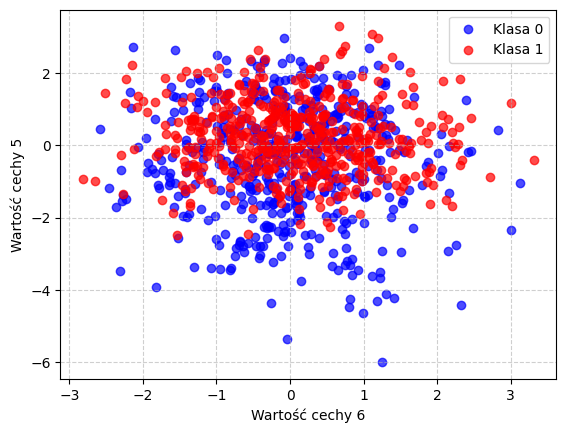

In [24]:
import random
from matplotlib import pyplot as plt

f1 = random.randint(0, X.shape[1]-1)
f2 = random.randint(0, X.shape[1]-1)

plt.scatter(X[y==0, f1], X[y==0, f2], color= 'blue', label='Klasa 0', alpha=0.7)
plt.scatter(X[y==1, f1], X[y==1, f2], color='red', label='Klasa 1', alpha=0.7)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xlabel(f"Wartość cechy {f1}")
plt.ylabel(f"Wartość cechy {f2}")
plt.legend()
plt.show()




##Implementacja sieci neuronowej

W PyTorch wszystkie klasy implementujące moduły sieci neuronowej dziedziczą z klasy `nn.Module`. Jeśli piszemy własną klasę definiującą moduł sieci neuronowej **musi ona również dziedziczyć z klasy `nn.Module`**.
Utworzymy klasę `MyMLP` implementujący wielowarwarstwowy perceptron złożony z dwóch warstw liniowych `nn.Linear` i nieliniowości `ReLU`.
Aby zmniejszyć ryzyko przeuczenia i poprawić generalizację sieci przed ostatnią warstwą liniową zastosujemy warstwę odrzutu `nn.Dropout`.

*   W metodzie `__init__` inicjalizujemy warstwy i moduły wchodzących w skład sieci. Nic nie stoi na przeszkodzie aby częścią składową sieci była inna, wcześniej utworzona sieć.
*   W metodzie `forward` definiujemy logikę przetwarzania danych przez sieć. Jakie operacje i w jakiej kolejności są wykonywane na wejściowych danych. Najczęściej metoda `forward` otrzymuje jako argument pojedyczny tensor (ale teoretycznie może otrzymać zestaw kilku tensorów) i zwraca wynikowy tensor (lub tensory).

**UWAGA:** Kolejność definicji warstw w metodzie `__init__` nie określa kolejności w jakiej dane będą przetwarzane przez kolejne warstwy. Logikę przetwarzania dediniujemy w metodzie `forward`.

In [34]:
class MyMLP(nn.Module):
    def __init__(self, n_features: int, n_classes: int):
        super().__init__()
        self.fc1 = nn.Linear(n_features, 5)
        self.fc2 = nn.Linear(5, n_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

Utworzymy instancję klasy `MyMLP`. Jako argumenty podamy liczbę cech w zbiorze danych (`n_features`=10) oraz liczbę klas (`n_classes`=2)
Dla porównaniu utworzymy również prostą sieć złożoną z jednej warstwy liniowej.
Zauważmy, że zarówno dostępna w bibliotece PyTorch warstwa `nn.Linear` jak i zaimplementowana przez nas klasa `MyMLP` są pochodnymi klasy `nn.Module`.

In [35]:
import torch.nn as nn

n_features = X.shape[1]

mlp_net = MyMLP(n_features, 2)
linear_net = nn.Linear(n_features, 2)

print(f"{isinstance(linear_net, nn.Module)=}")
print(f"{isinstance(mlp_net, nn.Module)=}")

isinstance(linear_net, nn.Module)=True
isinstance(mlp_net, nn.Module)=True


In [36]:
print(mlp_net)

MyMLP(
  (fc1): Linear(in_features=10, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=2, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
)


In [37]:
print(linear_net)

Linear(in_features=10, out_features=2, bias=True)


Sprawdźmy działanie obu sieci. Każda z nich po przetworzeniu wsadu wektorów cech $X \in \mathbb{R}^{N \times 10}$ zwraca tensor liczb rzeczywistych rozmiaru $(N, 2)$.
Zauważmy, że tensor `z` zawierający wynikowe wartości ma włączone śledzenie obliczeń (`requires_grad=True`).

**UWAGA:** Aby przetworzyć dane przez moduł sieci NIE należy wywoływać bezpośrednio metody `forward`. Podajemy dane bezpośrednio do modelu, na przykład `my_model(X)`. Pozwala to oprócz przejścia w przód (*forward*) wykonać dodatkowe operacje niezbędne do prawidłowego działania sieci.

In [42]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.int64)
X_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)

z = linear_net(X_train_tensor)
print("linear_net:")
print(f"Rozmiar wejścia: {X_train_tensor.shape}")
print(f"Rozmiar wyjścia: {z.shape}")
print(f"Wyjście (pierwsze 5 elementów): {z[:5]}")
print(f"{z.requires_grad=}\n")

linear_net:
Rozmiar wejścia: torch.Size([800, 10])
Rozmiar wyjścia: torch.Size([800, 2])
Wyjście (pierwsze 5 elementów): tensor([[ 0.3387,  0.5785],
        [-0.5632,  1.5130],
        [-0.6616,  0.0139],
        [-1.0285, -0.5934],
        [ 0.1780,  0.5516]], grad_fn=<SliceBackward0>)
z.requires_grad=True



In [39]:
z = mlp_net(X_train_tensor)
print("mlp_net:")
print(f"Rozmiar wejścia: {X_train_tensor.shape}")
print(f"Rozmiar wyjścia: {z.shape}")
print(f"Wyjście (pierwsze 5 elementów): {z[:5]}")
print(f"{z.requires_grad=}")

mlp_net:
Rozmiar wejścia: torch.Size([800, 10])
Rozmiar wyjścia: torch.Size([800, 2])
Wyjście (pierwsze 5 elementów): tensor([[ 0.1318,  0.3172],
        [ 0.3921,  0.1144],
        [-0.0514,  0.4752],
        [ 0.8376,  0.2173],
        [ 0.4731, -0.1127]], grad_fn=<SliceBackward0>)
z.requires_grad=True


W naszym przypadku wyjścia z sieci możemy je traktować jako nieznormalizowane rozkłady prawdopodobieństwa każdej klasy.
W literaturze poświęconej głębokiemu uczeniu nieznormalizowane wyjścia z sieci przyjmujące wartości rzeczywiste z zakresu $\left( -\infty, \infty \right)$ zwane są **logitami**.
Aby zamienić wyjścia z sieci (logity) na rozkład prawdopodobieństwa klas należy zastosować funkcję softmax.

**WAŻNE**: Nie należy normalizować wartości zwracanych przez sieć, na przykład stosując funkcję softmax lub sigmoid  wewnątrz modułu sieci. Ze względu na stabilność numeryczną funkcje straty zaimplementowane w PyTorch, takie jak entropia krzyżowa, domyślnie operują na nieznormalizowanych wartościach (logitach).

In [40]:
print(f"Surowe wyjścia z sieci (logity)")
print(f"{z=}")
print(f"\nWyjścia z sieci po normalizacji (softmax)")
print(f"{torch.nn.functional.softmax(z)=}")

Surowe wyjścia z sieci (logity)
z=tensor([[ 0.1318,  0.3172],
        [ 0.3921,  0.1144],
        [-0.0514,  0.4752],
        ...,
        [ 0.2463,  0.5416],
        [ 0.6520,  0.2428],
        [-0.0775,  0.4974]], grad_fn=<AddmmBackward0>)

Wyjścia z sieci po normalizacji (softmax)
torch.nn.functional.softmax(z)=tensor([[0.4538, 0.5462],
        [0.5690, 0.4310],
        [0.3713, 0.6287],
        ...,
        [0.4267, 0.5733],
        [0.6009, 0.3991],
        [0.3601, 0.6399]], grad_fn=<SoftmaxBackward0>)


<ipython-input-40-fa53eab7a003>:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(f"{torch.nn.functional.softmax(z)=}")


In [45]:
def calc_accuracy(logits: torch.Tensor, y_true: torch.Tensor) -> float:
    y_pred_labels = torch.argmax(logits, dim=1).float()
    accuracy = (y_pred_labels == y_true).sum().item() / y_true.size(0)
    return accuracy

Funkcja `train_network` implementuje prostą pętlę treningową modelu sieci neuronowej.

*   Trening modelu jest podzielony na **epoki**. W czasie jednej epoki następuje jednokrotne przejście przez zbiór danych.
*   Zwykle w każdej epoce iteracyjnie przetwarzane są kolejne **wsady** ze zbioru danych. W naszym przypadku, ponieważ zbiór danych jest względnie mały, wsad zawiera wszystkie dane.
*   Przetworzenie jednego wsadu (w naszym przypadku wszystkich danych) składa się z następujących kroków:
    * Przetworzenie elementów wsadu przez sieć (przejście w przód): `logits = model(X_train_tensor)`
    *   Wyznaczenie wartość funkcji straty `loss = criterion(logits, y_train_tensor)`
    *   Wyznaczanie gradientu funkcji straty względem parametrów sieci (przejście w tył): `loss.backward()`
    *   Krok optymalizacji parametrów sieci: `optimizer.step()`

Jako funkcję straty wykorzystamy `CrossEntropyLoss`, łączącą w jednej klasie funkcję Softmax i funkcję straty binarnej entropii krzyżowej (patrz: [link](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html#torch.nn.CrossEntropyLoss)).

**WAŻNE - specyfika PyTorcha:**

*   Domyślnie gradienty zapamiętywane w tensorach podlegających optymalizacji (wagach sieci) akumulują się po każdym wywołaniu przejścia w tył (metody `backward`). Dlatego konieczne jest wyzerowanie gradientów poleceniem `optimizer.zero_grad()`. Więcej informacji: [link](https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch).
*   Moduł sieci neuronowej może być w trybie treningowym (`train`) lub ewaluacyjnym (`eval`). W fazie trenowania model musi zostać przełączony w tryb treningowy poleceniem `model.train()`. Przy wykorzystaniu modelu do wnioskowania (np. przy wyznaczaniu dokładności klasyfikacji na zbiorze testowym) należy przełączyć model w tryb ewaluacji poleceniem `model.eval()`.
Różnice między trybem `train` i `eval`: [link](https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch).
*   Podczas wyznaczania dokładności klasyfikacji na zbiorze testowym nie musimy budować grafu obliczeń - nie potrzebujemy wyznaczać gradientu funkcji straty. Wyłączymy budowania grafu obliczeń przy użyciu menadżera kontekstu
`with torch.no_grad():` co zmniejszy wykorzystanie zasobów obliczeniowych.


In [46]:
def train_network(model: nn.Module, criterion: nn.Module, optimizer: torch.optim.Optimizer, eta: float=0.2, n_epochs: int = 200):
    model.train()
    for k in range(n_epochs):
        optimizer.zero_grad()

        logits = model(X_train_tensor)

        loss = criterion(logits, y_train_tensor)

        loss.backward()

        optimizer.step()

        train_accuracy = calc_accuracy(logits, y_train_tensor)

        with torch.no_grad():
            model.eval()
            logits = model(X_test_tensor)
            model.train()
            test_accuracy = calc_accuracy(logits.squeeze(1), y_test_tensor)

        if k % 20 == 0:
            print(f"Epoch: {k}   Wartość funkcji straty: {loss.item():.5f}   Dokładność (train): {train_accuracy:.4f}   Dokładność (test): {test_accuracy:.4f}")


Trening i ewaluacja klasyfikatora `linear_net` opartego o pojedynczą warstwę liniową (regresja logistyczna).

In [47]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(linear_net.parameters(), lr=0.1)
train_network(linear_net, criterion, optimizer)

Epoch: 0   Wartość funkcji straty: 0.94303   Dokładność (train): 0.4913   Dokładność (test): 0.6150
Epoch: 20   Wartość funkcji straty: 0.42148   Dokładność (train): 0.8237   Dokładność (test): 0.8100
Epoch: 40   Wartość funkcji straty: 0.39878   Dokładność (train): 0.8237   Dokładność (test): 0.8400
Epoch: 60   Wartość funkcji straty: 0.39645   Dokładność (train): 0.8275   Dokładność (test): 0.8250
Epoch: 80   Wartość funkcji straty: 0.39637   Dokładność (train): 0.8275   Dokładność (test): 0.8300
Epoch: 100   Wartość funkcji straty: 0.39635   Dokładność (train): 0.8287   Dokładność (test): 0.8300
Epoch: 120   Wartość funkcji straty: 0.39634   Dokładność (train): 0.8263   Dokładność (test): 0.8300
Epoch: 140   Wartość funkcji straty: 0.39634   Dokładność (train): 0.8275   Dokładność (test): 0.8300
Epoch: 160   Wartość funkcji straty: 0.39634   Dokładność (train): 0.8275   Dokładność (test): 0.8300
Epoch: 180   Wartość funkcji straty: 0.39634   Dokładność (train): 0.8275   Dokładność (

Trening i ewaluacja klasyfikatora opartego o perceptron wielowarstwowy `mlp_net`.

In [48]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mlp_net.parameters(), lr=0.1)
train_network(mlp_net, criterion, optimizer)

Epoch: 0   Wartość funkcji straty: 0.69231   Dokładność (train): 0.5850   Dokładność (test): 0.7250
Epoch: 20   Wartość funkcji straty: 0.25818   Dokładność (train): 0.8775   Dokładność (test): 0.8850
Epoch: 40   Wartość funkcji straty: 0.24114   Dokładność (train): 0.8875   Dokładność (test): 0.9300
Epoch: 60   Wartość funkcji straty: 0.23095   Dokładność (train): 0.8988   Dokładność (test): 0.9300
Epoch: 80   Wartość funkcji straty: 0.19923   Dokładność (train): 0.9125   Dokładność (test): 0.9300
Epoch: 100   Wartość funkcji straty: 0.21267   Dokładność (train): 0.9087   Dokładność (test): 0.9200
Epoch: 120   Wartość funkcji straty: 0.20890   Dokładność (train): 0.9062   Dokładność (test): 0.9350
Epoch: 140   Wartość funkcji straty: 0.23485   Dokładność (train): 0.8875   Dokładność (test): 0.9150
Epoch: 160   Wartość funkcji straty: 0.20104   Dokładność (train): 0.9075   Dokładność (test): 0.9250
Epoch: 180   Wartość funkcji straty: 0.20819   Dokładność (train): 0.9038   Dokładność (

Dla porównania sprawdzimy skuteczność klasyfikatora regresji logistycznej z biblioteki scikit-learn.

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

y_test_pred = model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Dokładność (train): {train_accuracy:.4f}")
print(f"Dokładność (test): {test_accuracy:.4f}")


Dokładność (train): 0.8275
Dokładność (test): 0.8300
